In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración visual
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Cargar el dataset
df = pd.read_csv("dataset_feature_engineering.csv")  



# Información general
print("\nResumen del dataset:")
print(df.info())


Resumen del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 35 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   cc_num                           int64  
 1   merchant                         object 
 2   category                         object 
 3   amt                              float64
 4   first                            object 
 5   last                             object 
 6   gender                           object 
 7   street                           object 
 8   city                             object 
 9   state                            object 
 10  zip                              int64  
 11  lat                              float64
 12  long                             float64
 13  city_pop                         int64  
 14  job                              object 
 15  dob                              object 
 16  trans_num                       

In [3]:
# Vista general
print("Primeras filas del dataset:")
display(df.head())

Primeras filas del dataset:


,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,first_time_at_merchant,dist_between_client_and_merch,trans_month,trans_day,hour,year,times_shopped_at_merchant,times_shopped_at_merchant_year,times_shopped_at_merchant_month,times_shopped_at_merchant_day
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,...,True,78.773821,1,1,0,2019,5,4,2,1
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,...,True,30.216618,1,1,0,2019,4,4,1,1
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,...,True,108.102912,1,1,0,2019,4,3,1,1
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,...,True,95.685115,1,1,0,2019,1,1,1,1
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,...,True,77.702395,1,1,0,2019,6,1,1,1


In [4]:
# Verificar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
cc_num                             0
merchant                           0
category                           0
amt                                0
first                              0
last                               0
gender                             0
street                             0
city                               0
state                              0
zip                                0
lat                                0
long                               0
city_pop                           0
job                                0
dob                                0
trans_num                          0
unix_time                          0
merch_lat                          0
merch_long                         0
is_fraud                           0
amt_month                          0
amt_year                           0
amt_month_shopping_net_spend       0
count_month_shopping_net           0
first_time_at_merchant             0
dist_betwe

In [5]:
# Balance de clases
print("\nDistribución de la variable 'is_fraud':")
print(df['is_fraud'].value_counts(normalize=True) * 100)



Distribución de la variable 'is_fraud':
is_fraud
0    99.478999
1     0.521001
Name: proportion, dtype: float64


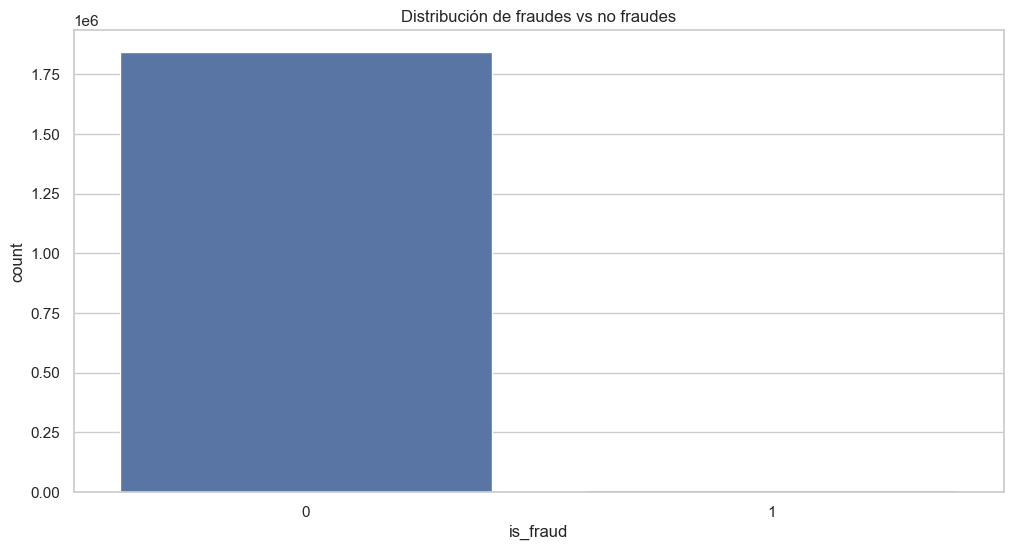

In [6]:
# Visualización del desbalance de clases
sns.countplot(x="is_fraud", data=df)
plt.title("Distribución de fraudes vs no fraudes")
plt.show()

In [7]:
# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
display(df.describe())



Estadísticas descriptivas:


,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,...,count_month_shopping_net,dist_between_client_and_merch,trans_month,trans_day,hour,year,times_shopped_at_merchant,times_shopped_at_merchant_year,times_shopped_at_merchant_month,times_shopped_at_merchant_day
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,...,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03,...,4.567241e+00,7.610956e+01,7.152067e+00,2.967456e+00,1.280612e+01,2.019501e+03,5.298079e+00,3.150459e+00,1.389109e+00,1.655442e+00
std,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02,...,4.575502e+00,2.909273e+01,3.424954e+00,2.197983e+00,6.815753e+00,4.999996e-01,3.094345e+00,1.865369e+00,6.722559e-01,9.025901e-01
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00,...,0.000000e+00,2.227351e-02,1.000000e+00,0.000000e+00,0.000000e+00,2.019000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00,...,1.000000e+00,5.534198e+01,4.000000e+00,1.000000e+00,7.000000e+00,2.019000e+03,3.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00
50%,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00,...,3.000000e+00,7.824823e+01,7.000000e+00,3.000000e+00,1.400000e+01,2.020000e+03,5.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00
75%,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00,...,7.000000e+00,9.847204e+01,1.000000e+01,5.000000e+00,1.900000e+01,2.020000e+03,7.000000e+00,4.000000e+00,2.000000e+00,2.000000e+00
max,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00,...,4.800000e+01,1.518682e+02,1.200000e+01,6.000000e+00,2.300000e+01,2.020000e+03,2.800000e+01,1.700000e+01,9.000000e+00,9.000000e+00


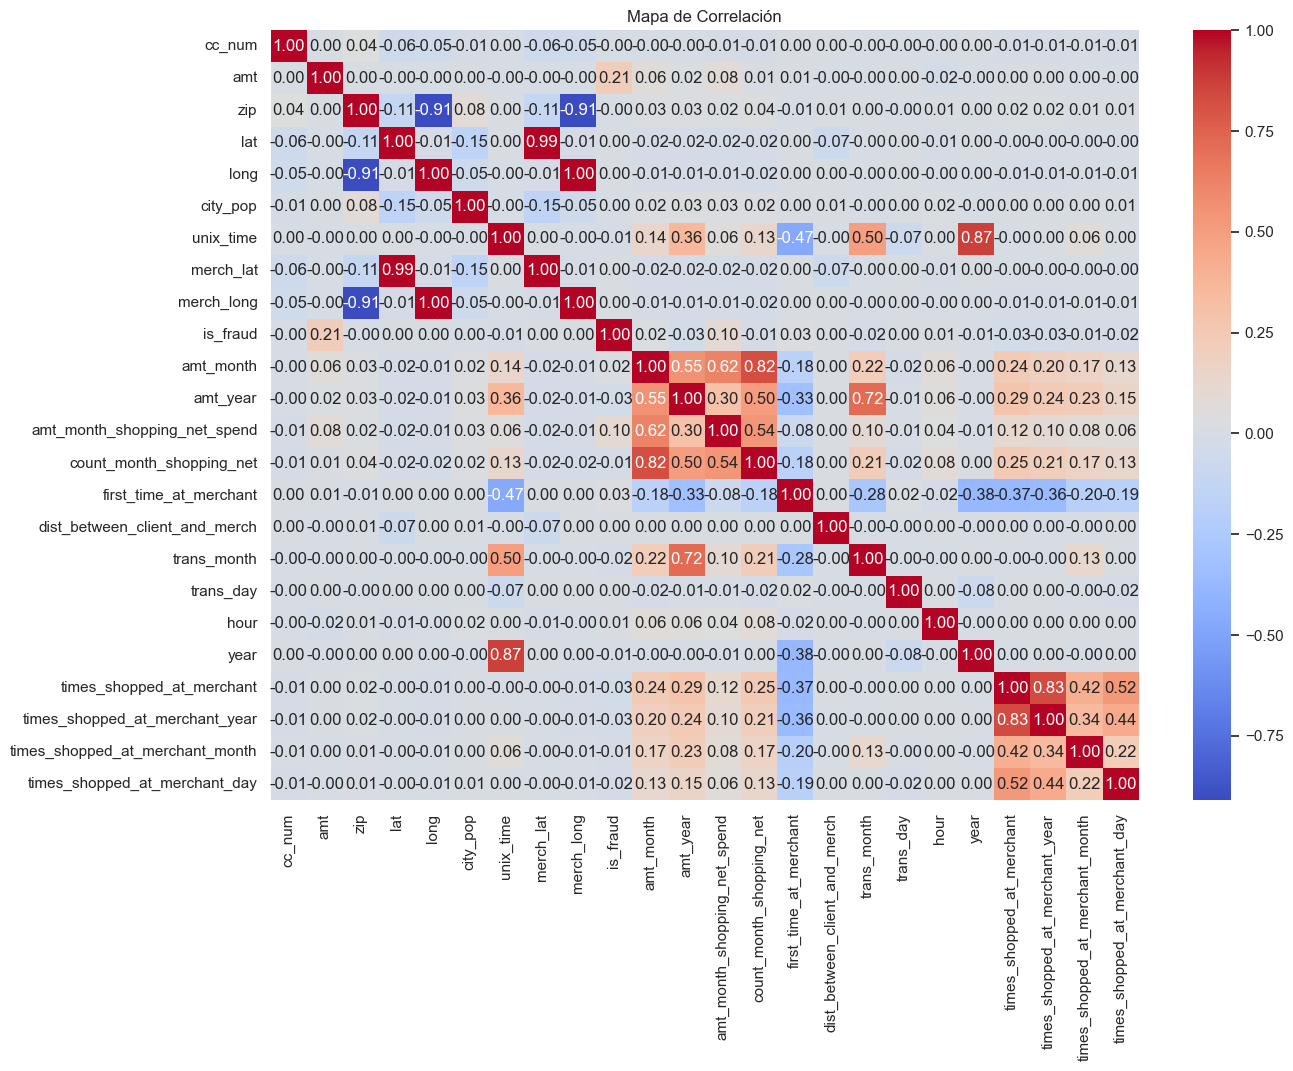

In [8]:
# Mapa de calor de correlación
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Mapa de Correlación")
plt.show()

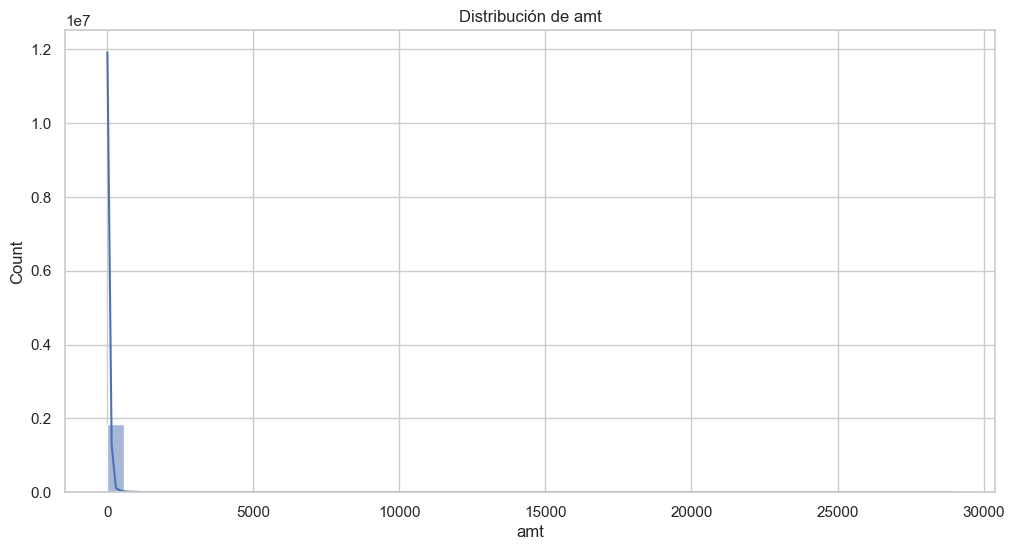

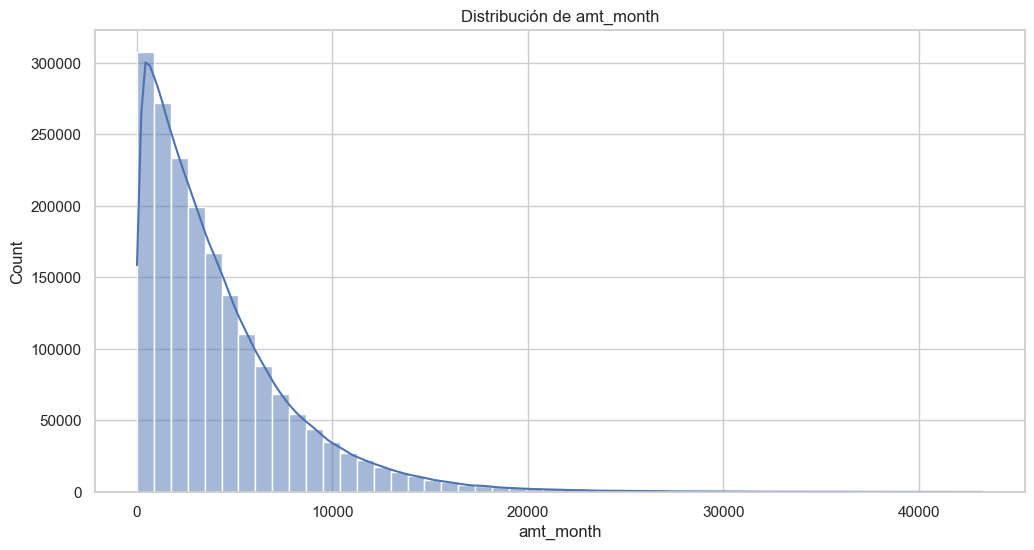

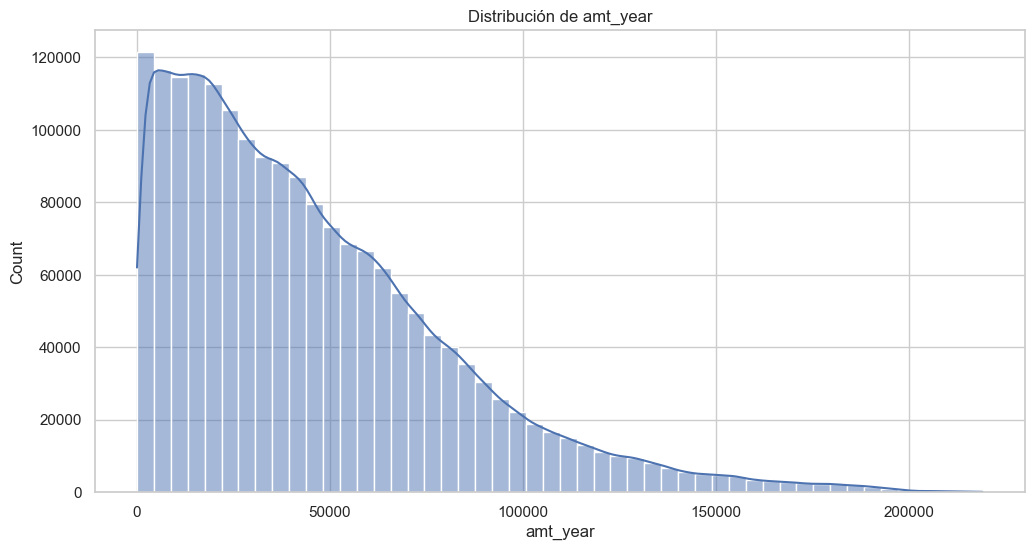

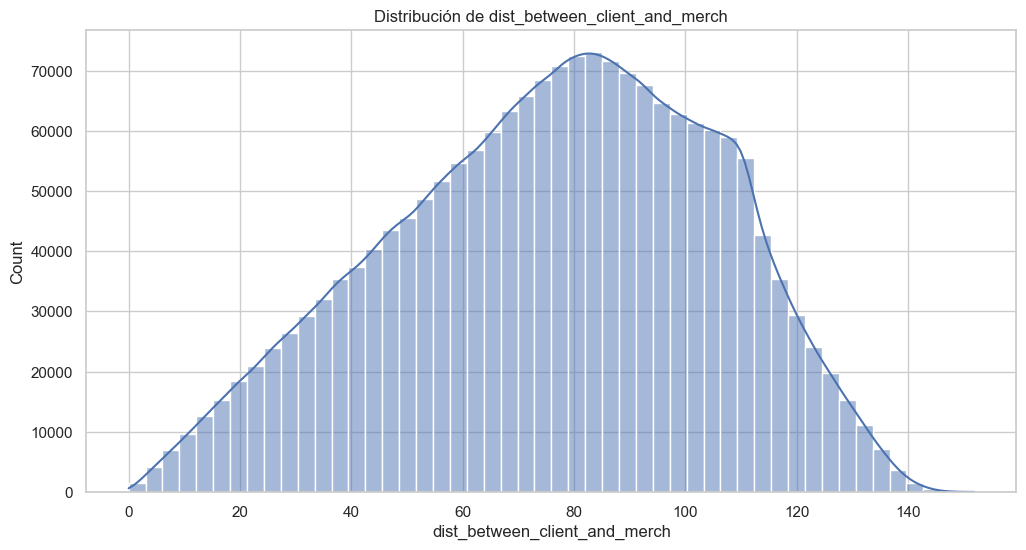

In [9]:
# Distribución de variables importantes
num_vars = ['amt', 'amt_month', 'amt_year', 'dist_between_client_and_merch']
for col in num_vars:
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f"Distribución de {col}")
    plt.show()

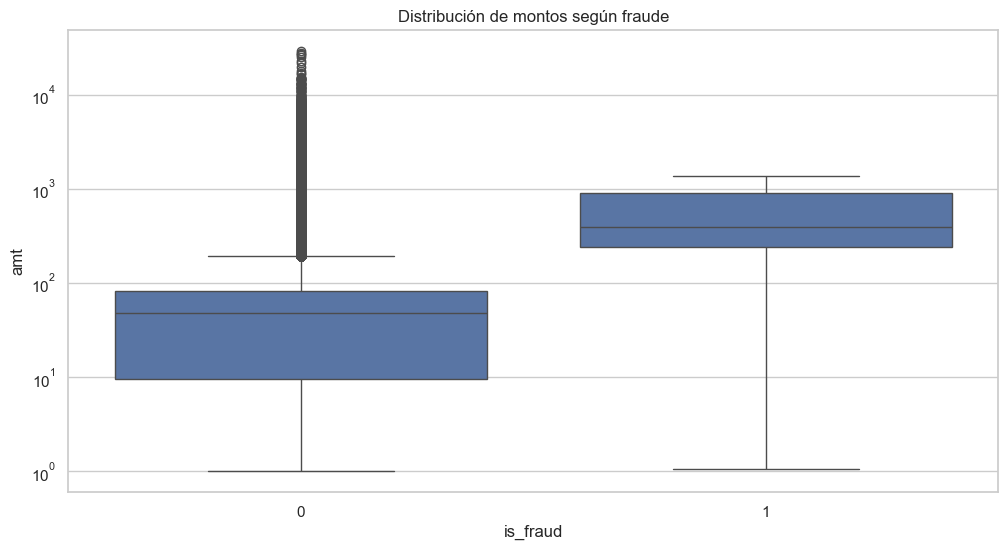

In [ ]:
# Comparación de 'amt' entre fraudes y no fraudes
sns.boxplot(x="is_fraud", y="amt", data=df)
plt.title("Distribución de montos según fraude")
plt.yscale("log") 
plt.show()

In [11]:
# 1. Filtrar categorías relevantes
filtered_df = df[df['category'].isin(['shopping_net', 'grocery_net', 'misc_net'])].copy()

# 2. Verificar nuevo balance de clases
print(filtered_df['is_fraud'].value_counts(normalize=True) * 100)

# 3. Nuevas features sugeridas
import numpy as np

# Transformaciones logarítmicas
filtered_df['log_amt'] = np.log1p(filtered_df['amt'])
filtered_df['log_amt_month'] = np.log1p(filtered_df['amt_month'])
filtered_df['log_amt_year'] = np.log1p(filtered_df['amt_year'])

# Ratios de gasto
filtered_df['ratio_amt_to_month'] = filtered_df['amt'] / (filtered_df['amt_month'] + 1)
filtered_df['ratio_amt_to_year'] = filtered_df['amt'] / (filtered_df['amt_year'] + 1)

# Hora peligrosa (noche = más fraudes)
filtered_df['is_night'] = filtered_df['hour'].apply(lambda x: 1 if 0 <= x <= 6 else 0)

# Bins de distancia
filtered_df['dist_bin'] = pd.cut(filtered_df['dist_between_client_and_merch'],
                                  bins=[0, 25, 50, 75, 100, np.inf],
                                  labels=['muy_cerca', 'cerca', 'media', 'lejos', 'muy_lejos'])

# Ver primeras filas con nuevas features
filtered_df.head()


is_fraud
0    98.787196
1     1.212804
Name: proportion, dtype: float64


,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,times_shopped_at_merchant_year,times_shopped_at_merchant_month,times_shopped_at_merchant_day,log_amt,log_amt_month,log_amt_year,ratio_amt_to_month,ratio_amt_to_year,is_night,dist_bin
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,...,4,2,1,1.786747,1.786747,1.786747,0.832496,0.832496,1,lejos
6,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,Holcomb,KS,...,4,1,1,3.818591,3.818591,3.818591,0.978041,0.978041,1,muy_lejos
11,377234009633447,fraud_Kerluke-Abshire,shopping_net,7.77,Theresa,Blackwell,F,43576 Kristina Islands,Shenandoah Junction,WV,...,5,1,2,2.171337,2.171337,2.171337,0.885975,0.885975,1,muy_lejos
15,6011999606625827,fraud_Schmidt and Sons,shopping_net,3.26,Ronald,Carson,M,870 Rocha Drive,Harrington Park,NJ,...,2,1,1,1.449269,1.449269,1.449269,0.765258,0.765258,1,lejos
16,6011860238257910,fraud_Lebsack and Sons,misc_net,327.00,Lisa,Mendez,F,44259 Beth Station Suite 215,Lahoma,OK,...,2,1,1,5.793014,5.793014,5.793014,0.996951,0.996951,1,lejos


In [12]:
# Filtrado de categorías de interés (ecommerce)
df_filtered = df[df['category'].isin(['shopping_net', 'grocery_net', 'misc_net'])].copy()

print(f"Transacciones luego del filtrado: {len(df_filtered)}")
print(df_filtered['category'].value_counts())

# Ingeniería de variables básicas
df_filtered["log_amt"] = np.log1p(df_filtered["amt"])
df_filtered["log_amt_month"] = np.log1p(df_filtered["amt_month"])
df_filtered["log_amt_year"] = np.log1p(df_filtered["amt_year"])
df_filtered["log_dist"] = np.log1p(df_filtered["dist_between_client_and_merch"])

df_filtered["ratio_amt_to_month"] = df_filtered["amt"] / (df_filtered["amt_month"] + 1)
df_filtered["ratio_amt_to_year"] = df_filtered["amt"] / (df_filtered["amt_year"] + 1)

# Binario: transacción en madrugada
df_filtered["is_night"] = df_filtered["hour"].apply(lambda h: 1 if h < 6 else 0)

# Codificación de categoría
df_filtered["category_encoded"] = df_filtered["category"].map({
    "shopping_net": 0,
    "grocery_net": 1,
    "misc_net": 2
})

# Selección de features para modelo
features = [
    "log_amt", "log_amt_month", "log_amt_year", "log_dist",
    "ratio_amt_to_month", "ratio_amt_to_year", "is_night",
    "first_time_at_merchant", "category_encoded",
    "times_shopped_at_merchant", "times_shopped_at_merchant_month"
]

target = "is_fraud"


Transacciones luego del filtrado: 294854
category
shopping_net    139322
misc_net         90654
grocery_net      64878
Name: count, dtype: int64


In [13]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, classification_report

# División de datos: último trimestre como test
df_filtered["trans_date"] = pd.to_datetime(df_filtered["year"].astype(str) + "-" + df_filtered["trans_month"].astype(str) + "-01")
train_df = df_filtered[df_filtered["trans_date"] < "2020-10-01"]
test_df = df_filtered[df_filtered["trans_date"] >= "2020-10-01"]

X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

# Dataset para LightGBM
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Parámetros base
params = {
    'objective': 'binary',
    'metric': ['auc'],
    'boosting_type': 'gbdt',
    'verbosity': -1,
    'seed': 42,
    'learning_rate': 0.05,
    'num_leaves': 31
}

# Entrenamiento
model = lgb.train(
    params,
    train_data,
    num_boost_round=100,
    valid_sets=[train_data, test_data],
    valid_names=["train", "test"],
)

# Predicciones
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob >= 0.5).astype(int)

# Evaluación
auc = roc_auc_score(y_test, y_pred_prob)
f1 = f1_score(y_test, y_pred)

print(f"AUC-ROC: {auc:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred, digits=4))


AUC-ROC: 0.9985
F1 Score: 0.7482

Reporte de clasificación:
              precision    recall  f1-score   support

           0     0.9977    0.9983    0.9980     44573
           1     0.7758    0.7225    0.7482       364

    accuracy                         0.9961     44937
   macro avg     0.8868    0.8604    0.8731     44937
weighted avg     0.9959    0.9961    0.9960     44937

